In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensate/')
import Gillespie_backend as backend

In [8]:
ell = np.load('ell_rho.npy')
ell_fixed_anchor = np.load('ell_rho_with_fixed_anchor.npy')
N = np.load('N_rho.npy')
N_fixed_anchor = np.load('N_rho_with_fixed_anchor.npy')
rho00 = 0.001
rho = np.linspace(rho00,10*rho00,100)

Text(0.5, 0, 'rho')

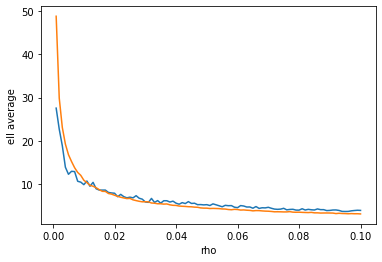

In [12]:
plt.plot(ell[:,1],ell[:,0])
plt.plot(ell_fixed_anchor[:,1],ell_fixed_anchor[:,0])
#plt.plot(ell[:,1],ell[0,1]**0.75*ell[0,0]/(ell[:,1]**0.75))
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('ell average')
plt.xlabel('rho')

Text(0, 0.5, 'N loop')

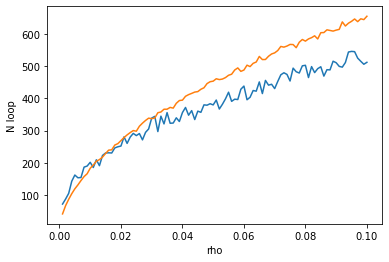

In [14]:
plt.plot(N[:,1],N[:,0])
plt.plot(N_fixed_anchor[:,1],N_fixed_anchor[:,0])
#plt.plot(N[:,1],N[:,1]*(N[-1,0]-N[0,0])/(N[-1,1]-N[0,1])+N[0,0])
plt.xlabel('rho')
plt.ylabel('N loop')
#plt.xscale('log')
#plt.yscale('log')

Text(0, 0.5, '1/ell')

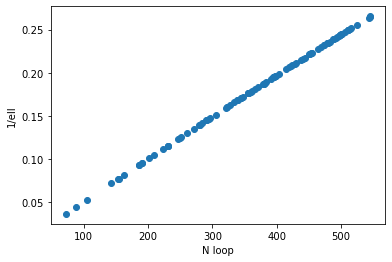

In [15]:
plt.scatter(N[:,0],1/ell[:,0])
#plt.plot(N[:,0],N[:,0]*(1/ell[-1,0]-1/ell[0,0])/(N[-1,0]-N[0,0])-N[0,0]+1/ell[0,0])
plt.xlabel('N loop')
plt.ylabel('1/ell')

Text(0, 0.5, 'N_loop.ell')

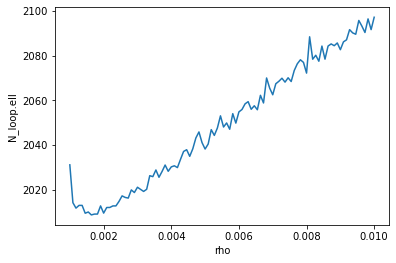

In [51]:
plt.plot(rho,N[:,0]*ell[:,0])
plt.xlabel('rho')
plt.ylabel('N_loop.ell')

In [19]:
temperature = 0.15
ell_tot = 2000.
distance_anchor = 1000.
rho00 = 0.0001
teq = 100
t_compute = 1000
S = backend.Gillespie(ell_tot,distance_anchor,rho00,temperature)
for t in range(teq):
    S.evolve()

In [29]:
N_loop,mean_ell,prod = list(),list(),list()
for i in range(t_compute):
    S.evolve()
    N_loop.append(S.get_N_loop())
    mean_ell.append(np.mean(S.get_ell()))
    prod.append(N_loop[-1]*mean_ell[-1])